In [8]:
import pandas as pd
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
from tqdm import tqdm

init_notebook_mode(connected=True)
cf.go_offline()

In [9]:
gen_to_mol_df = pd.read_csv('gen_to_mol_full.csv')

In [10]:
min_gen_len = 3000#19000
max_gen_len = 4096#32766

max_len_mol = 128

gen_len = []
mol_len = []

strange_vir = {}

for i in tqdm(range(len(gen_to_mol_df))):
    row = gen_to_mol_df.iloc[i]
    if (min_gen_len <= len(row['genetic_code']) <= max_gen_len) and len(row['canonical_smiles']) <= max_len_mol:
        gen_len.append(len(row['genetic_code']))
        mol_len.append(len(row['canonical_smiles']))
    
        if row['viralchembl_name'] not in strange_vir:
            strange_vir[row['viralchembl_name']] = 0
        strange_vir[row['viralchembl_name']] += 1

100%|██████████| 910584/910584 [01:54<00:00, 7931.20it/s]


In [11]:
strange_vir

{'Hepatitis B virus': 5635,
 'Duck hepatitis B virus': 255,
 'Argentinian mammarenavirus': 87,
 'Cali mammarenavirus': 118,
 'Rift Valley fever virus': 121,
 'Rotavirus A': 79,
 'Mammalian orthoreovirus 3': 4347,
 'Tacaribe mammarenavirus': 81,
 'Hantaan virus': 13,
 'Human rotavirus B': 1,
 'Woodchuck hepatitis virus': 174,
 'Prospect Hill orthohantavirus': 1,
 'Lassa mammarenavirus': 65577,
 'Rotavirus C': 4,
 'Sin Nombre orthohantavirus': 132,
 'Rotavirus G chicken/03V0567/DEU/2003': 56,
 'Red clover mottle virus': 3,
 'Lymphocytic choriomeningitis mammarenavirus': 1,
 'Andes orthohantavirus': 1,
 'Carnation ringspot virus': 13,
 'Carnation mottle virus': 13,
 'Guanarito mammarenavirus': 9,
 'Sabia mammarenavirus': 9,
 'Machupo mammarenavirus': 9}

In [12]:
print('Num sequences in dataset:', len(mol_len))

Num sequences in dataset: 76739


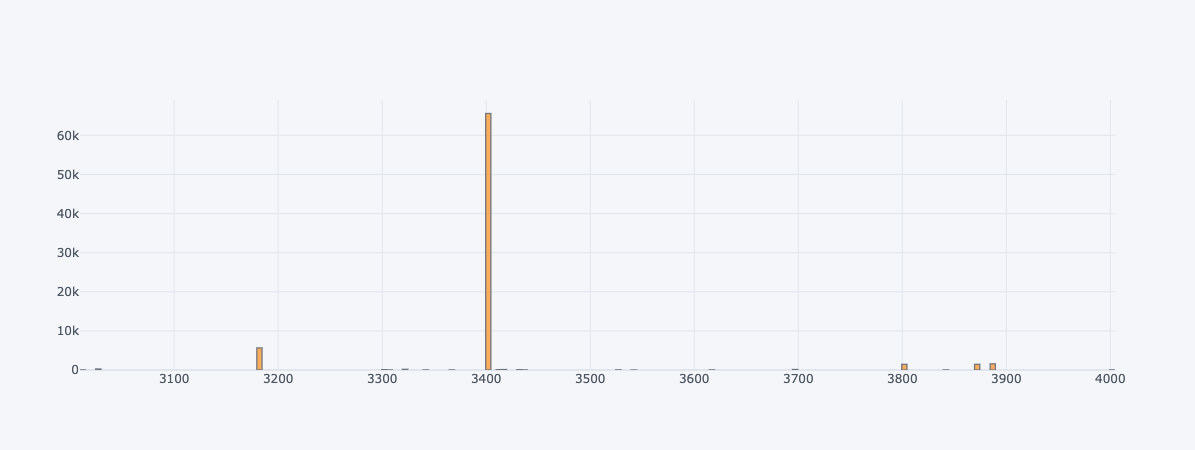

In [13]:
pd.DataFrame({'len':gen_len}).iplot(kind='histogram')

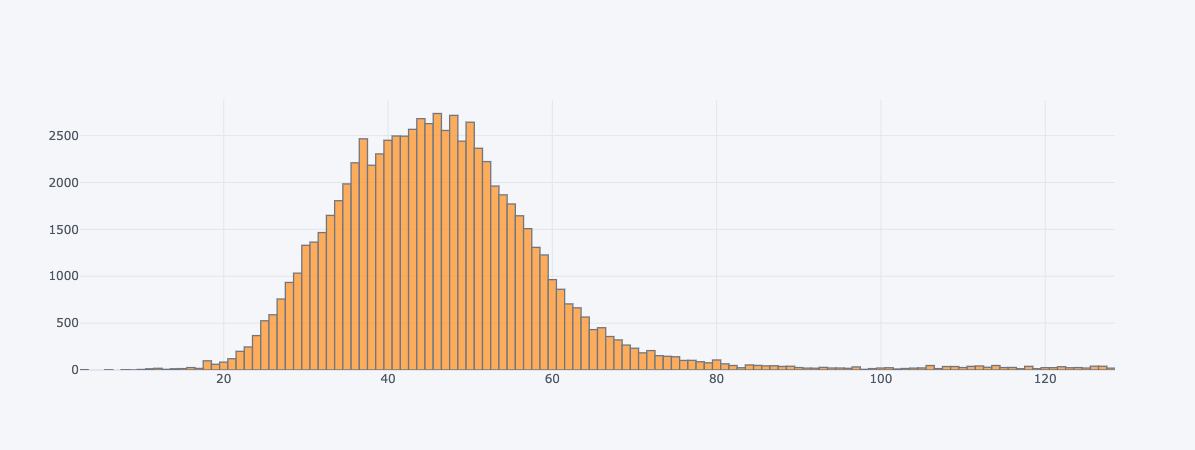

In [14]:
pd.DataFrame({'len':mol_len}).iplot(kind='histogram')